In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [267]:
def error_metric(reference, inferred):
    ref = np.array(reference)
    inf = np.array(inferred)
    se = np.abs(ref-inf)
    cse = np.sum(se)
    return np.round(cse, 4)
    # perc = []
    # for ref, inf in zip(reference, inferred):
    #     if ref > 0.01:
    #         perc.append(np.round((np.abs(ref-inf)/ref) * 100))
    # return perc
    # misest = []
    # for ref, inf in zip(reference, inferred):
    #     if ref == 0.0:
    #         misest.append(inf)
    # return misest

### Set up true values for 1D systems

In [3]:
# linear gaussian 1d
lg_1d_var_range = list(np.linspace(0, 1, 9, endpoint=True))
lg_1d_x2y_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
lg_1d_y2x_reflist = [0.0, 0.0092, 0.0356, 0.0763, 0.1276, 0.1861, 0.249, 0.3141, 0.3797]

# joint process 1d
jp_1d_var_range = list(np.linspace(-3, 3, 9, endpoint=True))
jp_1d_x2y_reflist = [0.8292, 0.8202, 0.7749, 0.6422, 0.4152, 0.1882, 0.0555, 0.0102, 0.0011]
jp_1d_y2x_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

### Set up sample sizes

In [4]:
sample_size_range = [500, 1000, 5000, 10000, 50000, 100000]
lg_1d_x2y_ss_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
lg_1d_y2x_ss_reflist = [0.1276] * 6

jp_1d_x2y_ss_reflist = [0.4152, 0.4152, 0.4152, 0.4152, 0.4152, 0.4152]
jp_1d_y2x_ss_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

### Set up true values for n-D systems

In [5]:
dim_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# linear gaussian with redundant dimensions
lg_reddim_x2y_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
lg_reddim_y2x_reflist = [0.1276, 0.1276, 0.1276, 0.1276, 0.1276, 0.1276, 0.1276, 0.1276, 0.1276, 0.1276]

# joint process with redundant dimensions
jp_reddim_x2y_reflist = [0.4152, 0.4152, 0.4152, 0.4152, 0.4152, 0.4152, 0.4152, 0.4152, 0.4152, 0.4152]
jp_reddim_y2x_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# linear gaussian without redundant dimensions
lg_nrdim_x2y_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
lg_nrdim_y2x_reflist = [0.1276, 0.2552, 0.3828, 0.5104, 0.638, 0.7656, 0.8932, 1.0208, 1.1484, 1.276]

# joint process without redundant dimensions
jp_nrdim_x2y_reflist = [0.4152, 0.8304, 1.2455, 1.6607, 2.0759, 2.4911, 2.9063, 3.3215, 3.7366, 4.1518]
jp_nrdim_y2x_reflist = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:

print(sum(lg_reddim_y2x_reflist))
print(sum(jp_reddim_x2y_reflist))
print(sum(lg_nrdim_y2x_reflist))
print(sum(jp_nrdim_x2y_reflist))

### Extractor function to average over results from multiple runs

In [57]:
def extract_results(system, method, dir, scenario, filter, along):
    assert system in ['lg', 'jp'], 'Invalid system'
    assert scenario in ['bivariate', 'samplesize', 'redundantdim', 'alldim'], 'Invalid scenarip'
    scenario_dict = {'bivariate':'bv', 'samplesize':'ss', 'redundantdim':'dimred', 'alldim':'dim'}
    assert dir in ['X2Y', 'Y2X'], 'Invalid direction'

    filename = f'../results{method}/{system}_results_TE_{dir}_{scenario_dict[scenario]}.csv'

    df = pd.read_csv(filename)
    
    

    filtered_df = df[df[list(filter.keys())].eq(pd.Series(filter)).all(axis=1)]
        
    if filtered_df.empty:
        raise ValueError("No data matches the filter criteria.")

    means = filtered_df.groupby(along)['result'].mean()
    means = np.round(means.values,4)
        
    stds = filtered_df.groupby(along)['result'].std()
    stds = np.round(stds.values,4)

    return means, stds

def extract_results_2(system, method, dir, scenario, filter, along):
    assert system in ['lg', 'jp'], 'Invalid system'
    assert scenario in ['bivariate', 'samplesize', 'redundantdim', 'alldim'], 'Invalid scenarip'
    scenario_dict = {'bivariate':'bv', 'samplesize':'ss', 'redundantdim':'dimred', 'alldim':'dim'}
    assert dir in ['X2Y', 'Y2X'], 'Invalid direction'

    filename = f'../results/{method}/{system}_results_TE_{dir}_{scenario_dict[scenario]}.csv'

    df = pd.read_csv(filename)
    
    

    filtered_df = df[df[list(filter.keys())].eq(pd.Series(filter)).all(axis=1)]
        
    if filtered_df.empty:
        raise ValueError("No data matches the filter criteria.")

    means = filtered_df.groupby(along)['result'].mean()
    means = np.round(means.values,4)
        
    stds = filtered_df.groupby(along)['result'].std()
    stds = np.round(stds.values,4)

    maximum = filtered_df.groupby(along)['result'].max()
    maximum = np.round(maximum.values,4)

    return means, stds, maximum

In [46]:
method_dict = {'knnksg':'NPEET', 'cmigan':'C-MI-GAN','agmte':'AGM-TE','njee':'NJEE'}

In [224]:
color_dict = {'knnksg':'royalblue', 'cmigan':'green','agmte':'red','njee':'darkviolet'}

## Three plots from the main text

### Redundant dimensions

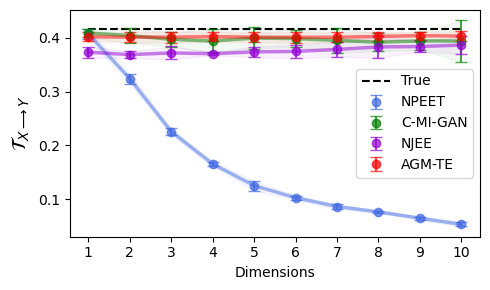

In [229]:
plt.figure(figsize=(5, 3))
x = dim_range
plt.plot(dim_range, jp_reddim_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=1.5)
# Estimate
methods = ['knnksg', 'cmigan', 'njee', 'agmte']
for method in methods:
    mean, std = extract_results('jp', method, 'X2Y', 'redundantdim', filter={'method': method, 'sample_size':100000}, along='n_dim')
    std = std*2
    plt.fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.05)
    plt.plot(x, mean, color=color_dict[method], alpha=0.5, linewidth = 2.5)
    plt.errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=4, markersize=6, alpha=0.7)
    #cse = error_metric(lg_1d_y2x_reflist, mean)
    #print(method, cse)
plt.legend(loc='center right')
plt.xlabel('Dimensions', fontsize=10)
plt.ylabel('$\mathcal{T}_{X \longrightarrow Y}$', fontsize=14)
plt.xticks(x)
#plt.title('Joint Process', fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig('perf_reddim.pdf')

### Non-redundant dimensions

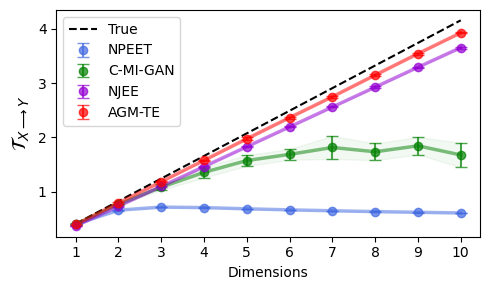

In [264]:
plt.figure(figsize=(5, 3))
x = dim_range
plt.plot(dim_range, jp_nrdim_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=1.5)
# Estimate
methods = ['knnksg', 'cmigan', 'njee', 'agmte']
for method in methods:
    mean, std = extract_results('jp', method, 'X2Y', 'alldim', filter={'method': method, 'sample_size':100000}, along='n_dim')
    std = std*2
    plt.fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.05)
    plt.plot(x, mean, color=color_dict[method], alpha=0.5, linewidth = 2.5)
    plt.errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=4, markersize=6, alpha=0.7)
    #cse = error_metric(lg_1d_y2x_reflist, mean)
    #print(method, cse)
plt.legend(loc='upper left')
plt.xlabel('Dimensions', fontsize=10)
plt.ylabel('$\mathcal{T}_{X \longrightarrow Y}$', fontsize=14)
plt.xticks(x)
#plt.title('Joint Process', fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig('perf_nrdim.pdf')

### Total error across 1D systems with sample size

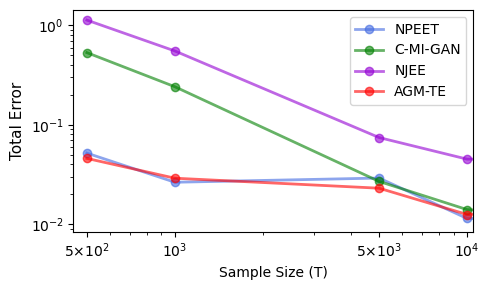

In [246]:
toterr_knnksg = np.zeros(6)
totstd_knnksg = np.zeros(6)
maxerr_knnksg = np.zeros(6)
toterr_cmigan = np.zeros(6)
totstd_cmigan = np.zeros(6)
maxerr_cmigan = np.zeros(6)
toterr_njee = np.zeros(6)
totstd_njee = np.zeros(6)
maxerr_njee = np.zeros(6)
toterr_agmte = np.zeros(6)
totstd_agmte = np.zeros(6)
maxerr_agmte = np.zeros(6)
methods = ['knnksg', 'cmigan', 'njee', 'agmte']


for method in methods:
    for dir in ['X2Y', 'Y2X']:
        for system in ['lg', 'jp']:
            mean, std, max = extract_results_2(system, method, dir, 'samplesize', filter={'method': method}, along='sample_size')
            std = std*2

            if dir == 'X2Y':
                if system == 'lg':
                    ref = lg_1d_x2y_ss_reflist
                elif system == 'jp':
                    ref = jp_1d_x2y_ss_reflist
            elif dir == 'Y2X':
                if system == 'lg':
                    ref = lg_1d_y2x_ss_reflist
                elif system == 'jp':
                    ref = jp_1d_y2x_ss_reflist

            mean = np.abs(mean - ref)
            max = np.abs(max - ref)

            if method == 'knnksg':
                toterr_knnksg += mean
                totstd_knnksg += std
                maxerr_knnksg += max
            elif method == 'cmigan':
                toterr_cmigan += mean
                totstd_cmigan += std
                maxerr_cmigan += max
            elif method == 'njee':
                toterr_njee += mean
                totstd_njee += std
                maxerr_njee += max
            elif method == 'agmte':
                toterr_agmte += mean
                totstd_agmte += std
                maxerr_agmte += max


plt.figure(figsize=(5, 3))
for method in methods:
    if method == 'knnksg':
        toterr = toterr_knnksg
        totstd = totstd_knnksg
        maxerr = maxerr_knnksg
    elif method == 'cmigan':
        toterr = toterr_cmigan
        totstd = totstd_cmigan
        maxerr = maxerr_cmigan
    elif method == 'njee':
        toterr = toterr_njee
        totstd = totstd_njee
        maxerr = maxerr_njee
    elif method == 'agmte':
        toterr = toterr_agmte
        totstd = totstd_agmte
        maxerr = maxerr_agmte

    totstd = totstd
    toterr = toterr
    totstd = totstd
    maxerr = maxerr
    plt.plot(sample_size_range, toterr, label=method_dict[method], color=color_dict[method], alpha=0.6, linewidth = 2, marker='o')
    
xticklabs = ["5×$10^2$", "$10^3$", "5×$10^3$", "$10^4$", "5×$10^4$", "$10^5$"]
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (T)', fontsize=10)#, weight='bold')
plt.ylabel('Total Error', fontsize=11)#, weight='bold')
plt.xticks(sample_size_range, xticklabs)
plt.hlines(0, 0, 100000, color='black', linestyle='dashed', linewidth=2)
plt.xlim(450, 10500)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('perf_samplesize.pdf')

### Basic plot of 1D systems

knnksg 0.0165
cmigan 0.0324
njee 0.1095
agmte 0.0022
knnksg 0.0294
cmigan 0.0291
njee 0.0654
agmte 0.0228
knnksg 0.0617
cmigan 0.0403
njee 0.1439
agmte 0.0949
knnksg 0.034
cmigan 0.0461
njee 0.1203
agmte 0.0013


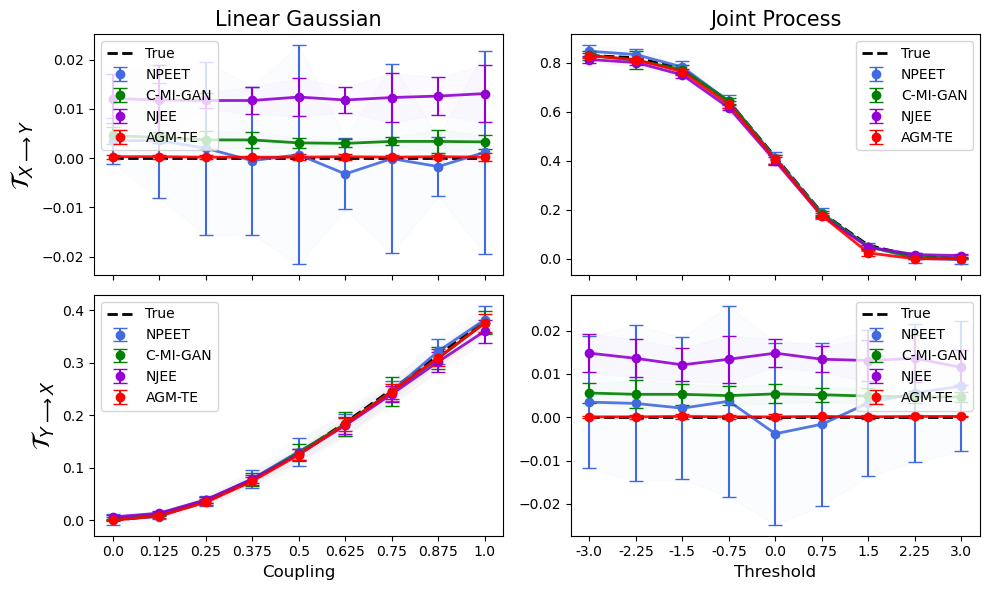

In [275]:
def plot_1d(methods):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex='col')

    # Linear Gaussian
    # X -> Y
    x = lg_1d_var_range
    # True
    axs[0, 0].plot(x, lg_1d_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'X2Y', 'bivariate', filter={'method': method}, along='coupling')
        std = std*2
        axs[0, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(lg_1d_x2y_reflist, mean)
        print(method, cse)

    axs[0, 0].legend(loc='upper left')
    # Y -> X
    # True
    axs[1, 0].plot(x, lg_1d_y2x_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'Y2X', 'bivariate', filter={'method': method}, along='coupling')
        std = std*2
        axs[1, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(lg_1d_y2x_reflist, mean)
        print(method, cse)

    axs[1, 0].legend(loc='upper left')

    # Joint Process
    # X -> Y
    x = jp_1d_var_range
    # True
    axs[0, 1].plot(x, jp_1d_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'X2Y', 'bivariate', filter={'method': method}, along='coupling')
        std = std*2
        axs[0, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(jp_1d_x2y_reflist, mean)
        print(method, cse)

    axs[0, 1].legend(loc='upper right')
    # Y -> X
    # True
    axs[1, 1].plot(x, jp_1d_y2x_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'Y2X', 'bivariate', filter={'method': method}, along='coupling')
        std = std*2
        axs[1, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(jp_1d_y2x_reflist, mean)
        print(method, cse)

    axs[1, 1].legend(loc='upper right')

    # # Set column titles
    axs[0, 0].set_title('Linear Gaussian', fontsize=15)
    axs[0, 1].set_title('Joint Process', fontsize=15)

    # # Set x-axis labels
    axs[1, 0].set_xlabel('Coupling', fontsize=12)
    axs[1, 1].set_xlabel('Threshold', fontsize=12)

    axs[1,0].set_xticks(lg_1d_var_range, lg_1d_var_range)
    axs[1,1].set_xticks(jp_1d_var_range, jp_1d_var_range)

    # # Set y-axis labels
    axs[0, 0].set_ylabel("$\mathcal{T}_{X \longrightarrow Y}$", fontsize=18)
    axs[1, 0].set_ylabel("$\mathcal{T}_{Y \longrightarrow X}$", fontsize=18)


    plt.tight_layout()
    plt.savefig('perf_1d.pdf')
    plt.show()
 

plot_1d(['knnksg','cmigan', 'njee', 'agmte'])

### Sample size scaling for 1D systems

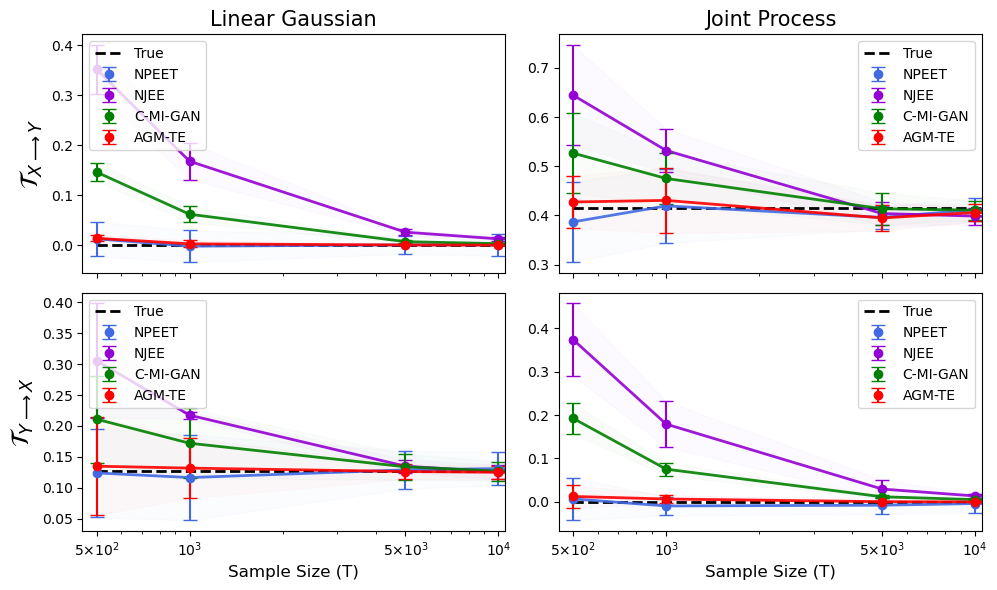

In [271]:
def plot_ss(methods):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex='col')

    # Linear Gaussian
    # X -> Y
    x = sample_size_range
    # True
    axs[0, 0].plot(x, lg_1d_x2y_ss_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'X2Y', 'samplesize', filter={'method': method}, along='sample_size')
        std = std*2
        axs[0, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)

    axs[0, 0].legend(loc='upper left')
    # Y -> X
    # True
    axs[1, 0].plot(x, lg_1d_y2x_ss_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'Y2X', 'samplesize', filter={'method': method}, along='sample_size')
        std = std*2
        axs[1, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)

    axs[1, 0].legend(loc='upper left')

    # Joint Process
    # X -> Y
    x = sample_size_range
    # True
    axs[0, 1].plot(x, jp_1d_x2y_ss_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'X2Y', 'samplesize', filter={'method': method}, along='sample_size')
        std = std*2
        axs[0, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)

    axs[0, 1].legend(loc='upper right')
    # Y -> X
    # True
    axs[1, 1].plot(x, jp_1d_y2x_ss_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'Y2X', 'samplesize', filter={'method': method}, along='sample_size')
        std = std*2
        axs[1, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)

    axs[1, 1].legend(loc='upper right')

    # # Set column titles
    axs[0, 0].set_title('Linear Gaussian', fontsize=15)
    axs[0, 1].set_title('Joint Process', fontsize=15)

    # # Set x-axis labels
    axs[1, 0].set_xlabel('Sample Size (T)', fontsize=12)
    axs[1, 1].set_xlabel('Sample Size (T)', fontsize=12)

    xticklabs = ["5×$10^2$", "$10^3$", "5×$10^3$", "$10^4$", "5×$10^4$", "$10^5$"]
    axs[1,0].set_xscale('log')
    axs[1,0].set_xticks(x, xticklabs)
    axs[1,1].set_xscale('log')
    axs[1,1].set_xticks(x, xticklabs)

    axs[0, 0].set_xlim(450, 10500)
    axs[0, 1].set_xlim(450, 10500)
    # # Set y-axis labels
    axs[0, 0].set_ylabel("$\mathcal{T}_{X \longrightarrow Y}$", fontsize=18)
    axs[1, 0].set_ylabel("$\mathcal{T}_{Y \longrightarrow X}$", fontsize=18)


    plt.tight_layout()
    plt.savefig('perf_ss.pdf')
    plt.show()

plot_ss(['knnksg','njee', 'cmigan', 'agmte'])

### Redundant dimensions

knnksg 0.0094
cmigan 0.0308
njee 0.0985
agmte 0.0053
knnksg 0.9359
cmigan 0.0213
njee 0.0628
agmte 0.0112
knnksg 2.5188
cmigan 0.177
njee 0.3896
agmte 0.1352
knnksg 0.0079
cmigan 0.035
njee 0.1012
agmte 0.0034


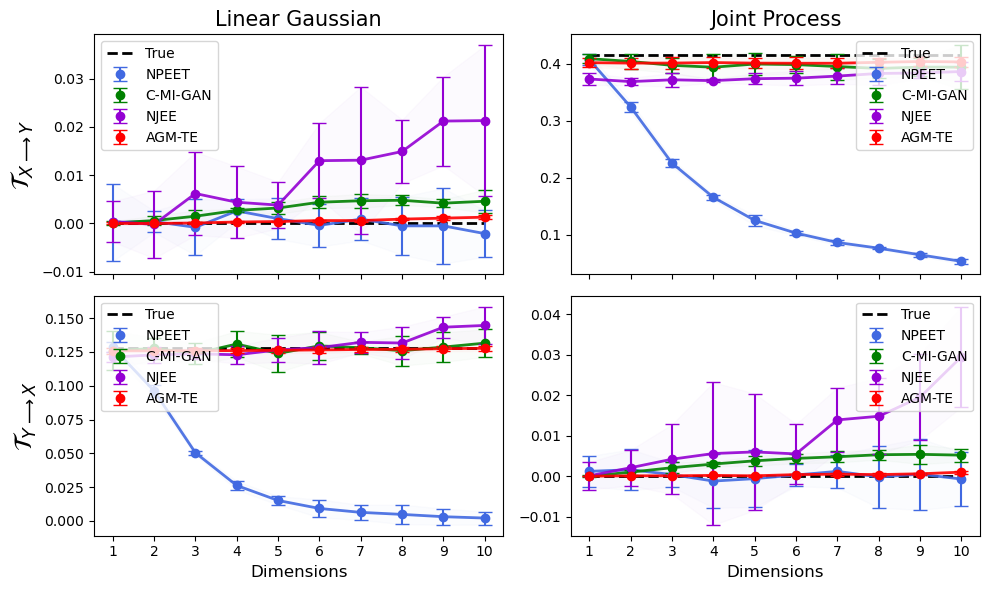

In [273]:
def plot_reddim(methods):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex='col')

    # Linear Gaussian
    # X -> Y
    x = dim_range
    # True
    axs[0, 0].plot(x, lg_reddim_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'X2Y', 'redundantdim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[0, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(lg_reddim_x2y_reflist, mean)
        print(method, cse)

    axs[0, 0].set_xticks(x)
    axs[0, 0].legend(loc='upper left')
    # Y -> X
    # True
    axs[1, 0].plot(x, lg_reddim_y2x_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'Y2X', 'redundantdim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[1, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(lg_reddim_y2x_reflist, mean)
        print(method, cse)
    axs[1, 0].set_xticks(x)
    axs[1, 0].legend(loc='upper left')

    # Joint Process
    # X -> Y
    x = dim_range
    # True
    axs[0, 1].plot(x, jp_reddim_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'X2Y', 'redundantdim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[0, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(jp_reddim_x2y_reflist, mean)
        print(method, cse)

    axs[0, 1].set_xticks(x)
    axs[0, 1].legend(loc='upper right')
    # Y -> X
    # True
    axs[1, 1].plot(x, jp_reddim_y2x_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'Y2X', 'redundantdim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[1, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(jp_reddim_y2x_reflist, mean)
        print(method, cse)

    axs[1, 1].set_xticks(x)
    axs[1, 1].legend(loc='upper right')

    # # Set column titles
    axs[0, 0].set_title('Linear Gaussian', fontsize=15)
    axs[0, 1].set_title('Joint Process', fontsize=15)

    # # Set x-axis labels
    axs[1, 0].set_xlabel('Dimensions', fontsize=12)
    axs[1, 1].set_xlabel('Dimensions', fontsize=12)

    # # Set y-axis labels
    axs[0, 0].set_ylabel("$\mathcal{T}_{X \longrightarrow Y}$", fontsize=18)
    axs[1, 0].set_ylabel("$\mathcal{T}_{Y \longrightarrow X}$", fontsize=18)


    plt.tight_layout()
    plt.savefig('perf_red.pdf')
    plt.show()

plot_reddim(['knnksg', 'cmigan', 'njee', 'agmte'])

### Non-redundant dimensions

knnksg 0.5428
cmigan 0.0283
njee 0.1181
agmte 0.0156
knnksg 4.6885
cmigan 0.2725
njee 0.2672
agmte 0.0397
knnksg 16.4389
cmigan 8.8677
njee 2.704
agmte 1.166
knnksg 0.0139
cmigan 0.0301
njee 0.1109
agmte 0.0037


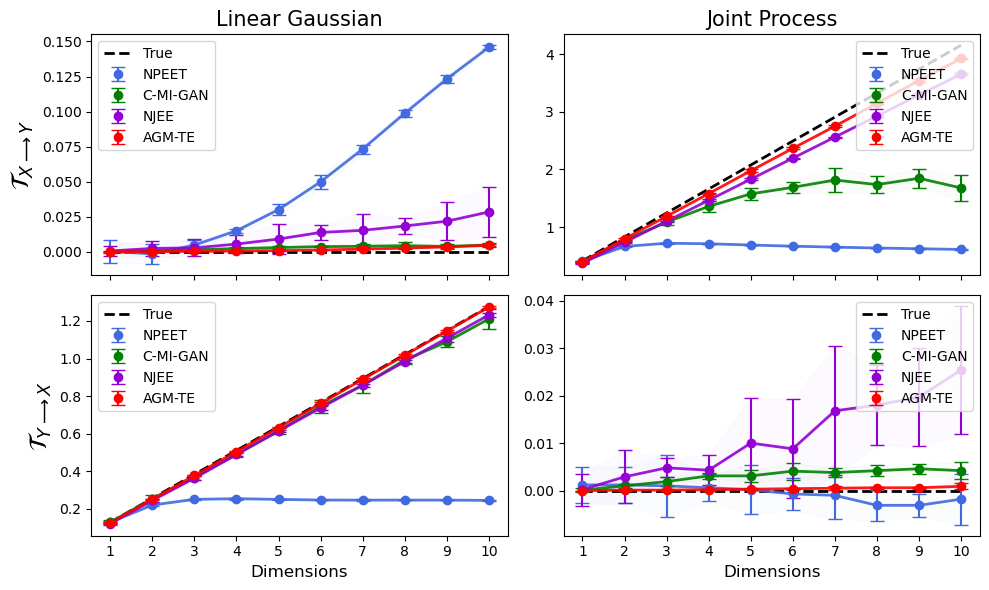

In [274]:
def plot_dim(methods):
    fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex='col')

    # Linear Gaussian
    # X -> Y
    x = dim_range
    # True
    axs[0, 0].plot(x, lg_nrdim_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'X2Y', 'alldim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[0, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(lg_nrdim_x2y_reflist, mean)
        print(method, cse)

    axs[0, 0].set_xticks(x)
    axs[0, 0].legend(loc='upper left')
    # Y -> X
    # True
    axs[1, 0].plot(x, lg_nrdim_y2x_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('lg', method, 'Y2X', 'alldim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[1, 0].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 0].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 0].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(lg_nrdim_y2x_reflist, mean)
        print(method, cse)

    axs[1, 0].set_xticks(x)
    axs[1, 0].legend(loc='upper left')

    # Joint Process
    # X -> Y
    x = dim_range
    # True
    axs[0, 1].plot(x, jp_nrdim_x2y_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'X2Y', 'alldim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[0, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[0, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[0, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(jp_nrdim_x2y_reflist, mean)
        print(method, cse)

    axs[0, 1].set_xticks(x)
    axs[0, 1].legend(loc='upper right')
    # Y -> X
    # True
    axs[1, 1].plot(x, jp_nrdim_y2x_reflist, label='True', color='black', linestyle='dashed', linewidth=2)
    # Estimate
    for method in methods:
        mean, std = extract_results('jp', method, 'Y2X', 'alldim', filter={'method': method, 'sample_size':100000}, along='n_dim')
        std = std*2
        axs[1, 1].fill_between(x, mean-std, mean+std, color=color_dict[method], alpha=0.02)
        axs[1, 1].plot(x, mean, color=color_dict[method], alpha=0.9, linewidth = 2)
        axs[1, 1].errorbar(x, mean, yerr=std, label=method_dict[method], color=color_dict[method], fmt='o', capsize=5)
        cse = error_metric(jp_nrdim_y2x_reflist, mean)
        print(method, cse)

    axs[1, 1].set_xticks(x)
    axs[1, 1].legend(loc='upper right')

    # # Set column titles
    axs[0, 0].set_title('Linear Gaussian', fontsize=15)
    axs[0, 1].set_title('Joint Process', fontsize=15)

    # # Set x-axis labels
    axs[1, 0].set_xlabel('Dimensions', fontsize=12)
    axs[1, 1].set_xlabel('Dimensions', fontsize=12)

    # # Set y-axis labels
    axs[0, 0].set_ylabel("$\mathcal{T}_{X \longrightarrow Y}$", fontsize=18)
    axs[1, 0].set_ylabel("$\mathcal{T}_{Y \longrightarrow X}$", fontsize=18)


    plt.tight_layout()
    plt.savefig('perf_stack.pdf')
    plt.show()

plot_dim(['knnksg', 'cmigan', 'njee', 'agmte'])